In [1]:
#In this analysis I intend to look at crime trends in Wayne County (Detroit) and want to prepare the data for analysis using ML
#I thought it would be interesting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', None)

In [3]:
df = pd.read_csv('crime.csv')

C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Let's take a look at a sample
df.sample(5)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
335511,-83.222991,42.429955,3581125,2012210267,Glastonbury Rd & W 7 Mile Rd,WEAPONS OFFENSE - CONCEALED,WEAPONS OFFENSES,5201,52001,WEAPONS OFFENSE - CONCEALED,2020/12/22 03:00:00+00,22:00:00,1,22,2020,803,8,261635407002013,O'Hair Park,1,48219,-83.222991,42.429955,335512
231768,-83.059841,42.433209,3450701,1912240231,Shields St & E 7 Mile Rd,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,2305,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2019/12/23 03:30:00+00,22:30:00,7,22,2019,1103,11,261635069001008,Farwell,3,48234,-83.059841,42.433209,231769
110989,-83.117780,42.344622,3216333,1805260175,W Warren Ave & McGraw St,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2018/05/26 19:50:00+00,15:50:00,6,15,2018,0403,04,261635273002019,Chadsey Condon,6,48210,-83.117780,42.344622,110990
67358,-82.947832,42.399482,3499037,2005140014,E Warren Ave & Somerset Ave,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2020/05/14 08:00:00+00,04:00:00,4,4,2020,0504,05,261635013002010,Morningside,4,48224,-82.947832,42.399482,67359
257190,-83.205259,42.403158,3027773,1702210027,Mansfield St & Keeler St,ARSON,ARSON,2099,20000,ARSON,2017/02/21 12:36:00+00,07:36:00,2,7,2017,0812,08,261635422002004,Crary/St Marys,1,48227,-83.205259,42.403158,257191


In [5]:
print("Describe Data")
df.describe()

Describe Data


,X,Y,crime_id,report_number,state_offense_code,day_of_week,hour_of_day,year,block_id,council_district,zip_code,longitude,latitude,oid
count,337072.000000,337072.000000,3.370720e+05,3.370720e+05,337072.000000,337072.000000,337072.000000,337072.000000,3.370720e+05,337072.000000,337072.000000,337072.000000,337072.000000,337072.000000
mean,-83.108851,42.389649,3.303215e+06,1.855209e+09,2365.319531,3.994325,11.611136,2018.434112,2.616353e+14,3.995755,48219.059139,-83.108851,42.389649,168536.500000
std,0.097639,0.037910,1.705267e+05,1.170790e+08,1133.165472,1.992059,7.516521,1.434658,3.414322e+08,2.040399,11.303905,0.097639,0.037910,97304.449305
min,-83.287776,42.255507,3.000004e+06,2.020703e+08,901.000000,1.000000,0.000000,1915.000000,2.616350e+14,1.000000,48201.000000,-83.287776,42.255507,1.000000
25%,-83.195512,42.359221,3.157199e+06,1.712190e+09,1302.000000,2.000000,4.000000,2017.000000,2.616351e+14,2.000000,48208.000000,-83.195512,42.359221,84268.750000
50%,-83.117738,42.394369,3.306320e+06,1.812280e+09,2305.000000,4.000000,13.000000,2018.000000,2.616353e+14,4.000000,48219.000000,-83.117738,42.394369,168536.500000
75%,-83.027817,42.422306,3.451317e+06,1.912260e+09,2900.000000,6.000000,18.000000,2019.000000,2.616354e+14,6.000000,48228.000000,-83.027817,42.422306,252804.250000
max,-82.910296,42.450498,3.591596e+06,2.110050e+09,9915.000000,7.000000,23.000000,2021.000000,2.616399e+14,7.000000,48243.000000,-82.910296,42.450498,337072.000000


In [6]:
#There's a few interesting things that we can see by just describing the data. Not everything makes sense, but that's ok.

In [7]:
print("Summarized Data")
df.describe(include=['O'])

Summarized Data


,address,offense_description,offense_category,arrest_charge,charge_description,incident_timestamp,incident_time,scout_car_area,precinct,neighborhood
count,337072,337072,337072,337072,337072,337072,337072,337072,337072,337072
unique,15784,135,30,224,171,214493,1440,289,27,207
top,S M 10 Service Drive & Grand River Ave,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2017/01/01 10:00:00+00,04:00:00,0312,08,Warrendale
freq,660,63449,61091,36864,56941,49,9655,4550,27137,9666


In [8]:
#Let's see how the categories look by just counting their values first

df['offense_category'].value_counts()

ASSAULT                   61091
LARCENY                   51623
DAMAGE TO PROPERTY        41890
AGGRAVATED ASSAULT        34603
BURGLARY                  28942
FRAUD                     27595
STOLEN VEHICLE            27200
WEAPONS OFFENSES           9921
ROBBERY                    9191
DANGEROUS DRUGS            7964
SEX OFFENSES               5103
OBSTRUCTING JUDICIARY      4905
STOLEN PROPERTY            3801
ARSON                      3357
SEXUAL ASSAULT             3143
OUIL                       2676
FAMILY OFFENSE             2561
MISCELLANEOUS              2058
OBSTRUCTING THE POLICE     2018
RUNAWAY                    1502
DISORDERLY CONDUCT         1283
HOMICIDE                   1145
FORGERY                    1048
OTHER                       977
KIDNAPPING                  795
LIQUOR                      401
EXTORTION                   181
JUSTIFIABLE HOMICIDE         63
SOLICITATION                 28
GAMBLING                      7
Name: offense_category, dtype: int64

In [9]:
#Sort the dataframe by most common to least common crimes for visualization

df = df.iloc[df.groupby('offense_category').offense_category.transform('size').argsort(kind='mergesort')][::-1]

In [10]:
from pygooglechart import PieChart3D

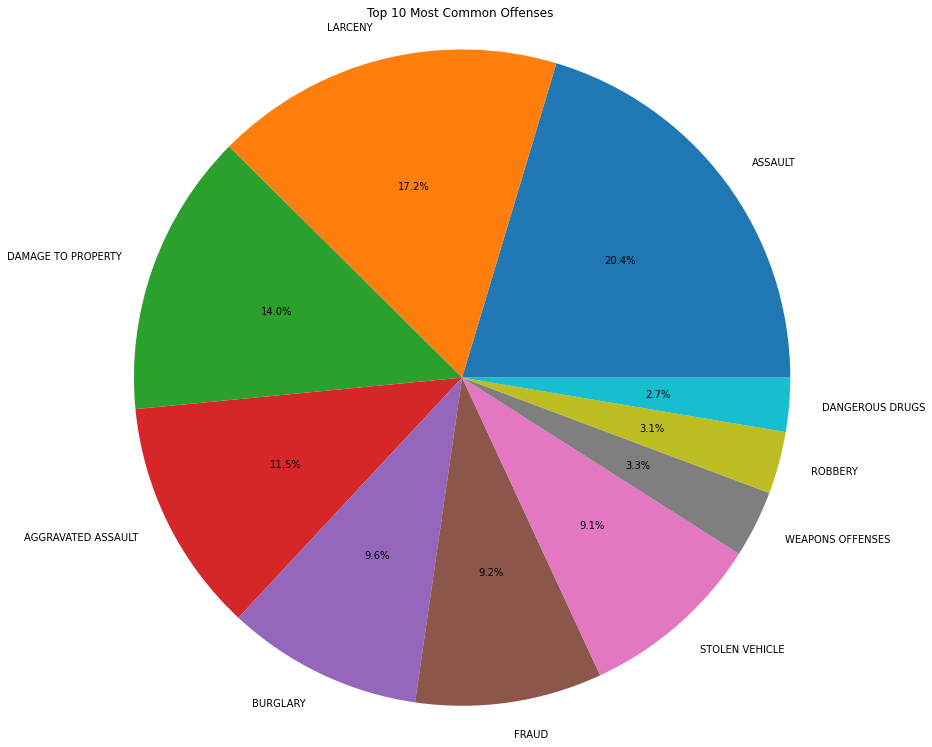

In [11]:
#Let's look at a pie chart of the offenses (offense_category)

#df.groupby(['offense_category']).sum().plot(kind='pie', y='offense_category')

plt.pie(df['offense_category'].value_counts()[:10],labels=df['offense_category'].unique()[:10],autopct='%1.1f%%')
plt.title('Top 10 Most Common Offenses')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.show()

array([[<AxesSubplot:title={'center':'hour_of_day'}>]], dtype=object)

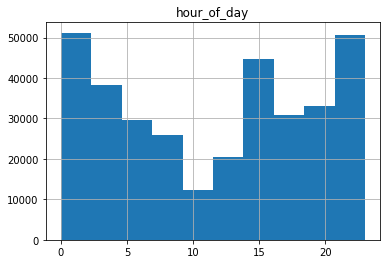

In [12]:
#When is crime most likely to occur?

df.hist(column='hour_of_day')

In [13]:
# It looks like the safest time to be in Detroit is between 9 and noon.

In [14]:
# Let's see if we can get rid of unwanted features automatically using Recursive Feature Embedding (RFE)
from sklearn.feature_selection import RFE

In [15]:
# I'm going to make the neighborhood into the target variable and, for that, I will use the label encoder.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [16]:
# Could be outdated

# Save the old data just in case we can't inverse transform our target
#old_data = list(df['neighborhood'].values)

In [17]:
#len(old_data)

In [18]:
# create the target value. In this case we will call it "target_neighborhood"
#df['target_neighborhood'] = le.fit_transform(old_data)

In [19]:
df.sample(5)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
89339,-83.273613,42.389234,3060846,1705060233,Riverview St & Dale St,MOTOR VEHICLE THEFT,STOLEN VEHICLE,2401,24001,MOTOR VEHICLE THEFT,2017/05/06 06:00:00+00,02:00:00,6,2,2017,0601,06,261635441003002,Eliza Howell,1,48223,-83.273613,42.389234,89340
268962,-83.216123,42.399831,3118820,1709180117,Grand River Ave & Archdale St,RUNAWAY,RUNAWAY,7070,70000,RUNAWAY,2017/09/17 04:00:00+00,00:00:00,7,0,2017,814,8,261635425003003,Grandmont,1,48227,-83.216123,42.399831,268963
157884,-83.153304,42.398031,3531833,2008090037,Northlawn St & Eaton St,ASSAULT AND BATTERY/SIMPLE ASSAULT,BURGLARY,2201,22001,BURGLARY - FORCED ENTRY,2020/08/09 10:10:00+00,06:10:00,7,6,2020,1001,10,261635364001005,Chalfonte,7,48238,-83.153304,42.398031,157885
45926,-83.080848,42.355785,3344156,1904110031,W Kirby St & Trumbull St,ASSAULT AND BATTERY/SIMPLE ASSAULT,DAMAGE TO PROPERTY,2900,29000,DAMAGE TO PROPERTY,2019/04/11 12:05:00+00,08:05:00,4,8,2019,0305,03,261635224002009,Elijah McCoy,5,48208,-83.080848,42.355785,45927
110078,-82.960500,42.424767,3210033,1805110165,Kelly Rd & Hazelridge St,DISORDERLY CONDUCT - GENERAL,DISORDERLY CONDUCT,5301,53001,DISORDERLY CONDUCT - GENERAL,2018/05/09 23:30:00+00,19:30:00,3,19,2018,0907,09,261635009004003,Denby,4,48224,-82.960500,42.424767,110079


In [20]:
# Remove the categorical feature that we no longer want to be in our data
#del df['neighborhood']

# Also, remove the timestamps and times because I don't want to do time series analysis. I only want to see what I can expect in each neighborhood.
del df['incident_timestamp']
del df['incident_time']

In [21]:
# Prepare the data for ML using get_dummies
ml_df = pd.get_dummies(df)

MemoryError: Unable to allocate 4.95 GiB for an array with shape (15784, 337072) and data type uint8

In [ ]:
# Because there is a memory error, that means that there are too many categorical features in the data, which as shown above would result in 15784 features... 
# which is too much for my computer to handle.

In [22]:
# Set the X and y variables for features and target to feed into the RFE

X = df.copy()
del X['zip_code']
y = df['zip_code']

In [23]:
# Let's now select 5 features to drop using the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

ValueError: could not convert string to float: 'Tuller St & Lyndon St'

In [24]:
df.columns

Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'day_of_week', 'hour_of_day', 'year',
       'scout_car_area', 'precinct', 'block_id', 'neighborhood',
       'council_district', 'zip_code', 'longitude', 'latitude', 'oid'],
      dtype='object')

In [25]:
# Looks like we need to do a little more cleaning and preparation. Back to step 3 of the CRISP-DM process!

delete_columns = ['X', 'Y', 'address', 'offense_description', 'state_offense_code', 'charge_description', 'longitude', 'latitude', 'scout_car_area', 'precinct', 'block_id', 'oid', 'arrest_charge']
for col in delete_columns:
    try:
        del df[col]
    except:
        pass

In [26]:
# Let's do a little more cleaning and make sure that our numerical values are in fact numerical

for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: int(x))
    except:
        pass

In [27]:
df.columns

Index(['crime_id', 'report_number', 'offense_category', 'day_of_week',
       'hour_of_day', 'year', 'neighborhood', 'council_district', 'zip_code'],
      dtype='object')

In [28]:
del df['neighborhood']

In [29]:
# Now let's see if we can get the dummy values so our ML model's work
ml_df = pd.get_dummies(df)

In [30]:
ml_df.shape

(337072, 37)

In [31]:
ml_df.sample(5)

,crime_id,report_number,day_of_week,hour_of_day,year,council_district,zip_code,offense_category_AGGRAVATED ASSAULT,offense_category_ARSON,offense_category_ASSAULT,offense_category_BURGLARY,offense_category_DAMAGE TO PROPERTY,offense_category_DANGEROUS DRUGS,offense_category_DISORDERLY CONDUCT,offense_category_EXTORTION,offense_category_FAMILY OFFENSE,offense_category_FORGERY,offense_category_FRAUD,offense_category_GAMBLING,offense_category_HOMICIDE,offense_category_JUSTIFIABLE HOMICIDE,offense_category_KIDNAPPING,offense_category_LARCENY,offense_category_LIQUOR,offense_category_MISCELLANEOUS,offense_category_OBSTRUCTING JUDICIARY,offense_category_OBSTRUCTING THE POLICE,offense_category_OTHER,offense_category_OUIL,offense_category_ROBBERY,offense_category_RUNAWAY,offense_category_SEX OFFENSES,offense_category_SEXUAL ASSAULT,offense_category_SOLICITATION,offense_category_STOLEN PROPERTY,offense_category_STOLEN VEHICLE,offense_category_WEAPONS OFFENSES
213345,3326421,1902230320,7,2,2019,7,48228,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
265157,3090226,1707130220,4,0,2017,1,48219,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
154008,3506887,2006040091,4,11,2020,7,48204,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180397,3095478,1707250251,2,19,2017,7,48228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
234482,3469379,2002120074,2,23,2020,2,48235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
X = ml_df.copy()
del X['zip_code']
y = df['zip_code']

In [33]:
# Time to standardize the features
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
sml_df = scaler.fit_transform(X)
X = pd.DataFrame(sml_df, columns=X.columns)

In [35]:
# Let's now select 5 features to drop using SGD Regressor
from sklearn.linear_model import SGDRegressor

In [36]:
estimator = SGDRegressor(max_iter=50000)
selector = RFE(estimator, n_features_to_select=len(X.columns)-5, step=1)
selector = selector.fit(X, y)

In [37]:
support = selector.support_

In [38]:
# Let's look at which columns are being removed now
removed_columns = []
for idx in range(len(support)):
    if support[idx] == False:
        removed_columns.append(X.columns[idx])

In [39]:
removed_columns

['day_of_week',
 'hour_of_day',
 'year',
 'offense_category_JUSTIFIABLE HOMICIDE',
 'offense_category_SOLICITATION']

In [40]:
del X['day_of_week']
del X['hour_of_day']
del X['year']

In [41]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

In [42]:
model = LogisticRegression(multi_class="auto", solver="liblinear")

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


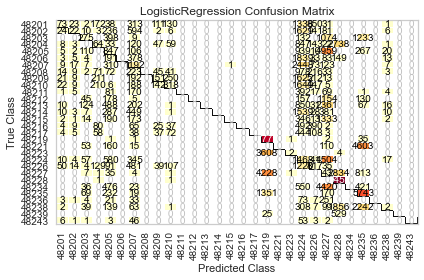

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
# The ConfusionMatrix visualizer takes a model
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
conf_mat = cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
conf_mat.score(X_test, y_test)

# How did we do?
conf_mat.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
X.shape

(337072, 33)

In [55]:
knn = KNeighborsClassifier(n_neighbors=len(df['zip_code'].unique()))

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.3576599  0.35860923 0.33174118 0.34488385 0.32497701 0.3064052
 0.30234076 0.26125137 0.11602931 0.28685436]


In [56]:
# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

0.29907521799882836


In [ ]:
# Based on this approach there is no easy way to determine where a crime is likely to occur with more than a 30% accuracy rate.
# This approach has been improved from previous approaches but it could still use some work.
# If we were to look further into different avenues I'm sure that we could come up with something better, but not with this approach.